<a href="https://colab.research.google.com/github/Likhitha0510/TCS-iON-RIO-45/blob/main/Main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vocabulary size: 8185
Encoded text: [  62   18   41  604  927   65    3  644 7968   21   35]
Label: 0
Encoded text: [  12   31   93  867    7 1256 6585 7961  421  365    2]
Label: 0
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 20)          163700    
_________________________________________________________________
global_average_pooling1d_6 ( (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 163,721
Trainable params: 163,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
658/658 [==============================] - 9s 13ms/step - loss: 0.6827 - accuracy: 0.5002 - val_loss: 0.6636 - val_accuracy: 0.5005
Epoch 2/15
658/658 [==============================] -

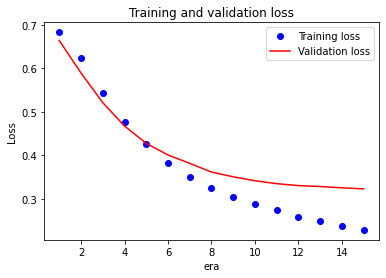

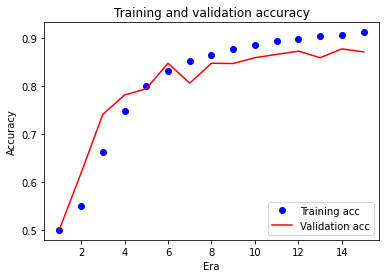

In [11]:
# Written by : Likhitha M
# Contact : likhilikhi2001@gmail.com
# RIO-45: Automate detection of different emotions from textual comments and feedback 

# Importing Libraries
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

# Loading IMDB data set, we will be using preprocessed dataset
(train_data, test_data), info = tfds.load(
      'imdb_reviews/subwords8k', 
     split = (tfds.Split.TRAIN, tfds.Split.TEST),
     as_supervised = True,
     with_info = True)


# Modeling, Text encoder can convert any string into integers.

encoder = info.features['text'].encoder

print ('Vocabulary size: {}'.format(encoder.vocab_size))

for train_example, train_label in train_data.take(2):
  print('Encoded text:', train_example[:11].numpy())
  print('Label:', train_label.numpy())

#Prediction Functions

BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(38))

test_batches = (
    test_data
    .padded_batch(38))

# Model definition

model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 20),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1)])

model.summary()

# Compiling the model
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Training the model
history = model.fit(train_batches,
                    epochs = 15,
                    validation_data = test_batches,
               validation_steps = 50)

# Validation of Loss and Accuracy

loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

# Taking care of the mask

def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  print("Prediction Score: ", predictions)
  output = ""
  if predictions[0][0] >= 0.5: output = "POSITIVE"
  elif predictions[0][0] <= -1: output = "NEGATIVE"
  else: output = "NEUTRAL"

  return output

# Observing the output
sample_pred_text = ('What an excellent performance')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

sample_pred_text = ('The performance was worst just a waste of money ')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

sample_pred_text = ('Moderate it was ok ok tmr it might be good c u n8')
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

sample_pred_text = ("""" Season 4 - Stuck in a Rut Script
westsideschl1 January 2021
1. Overacted like reciting highly scripted very fake dialogue, 
and all in sequence as if after every short line the director pauses to allow the actors to memorize the next line.
And, of course, practice a devilish smile. 
2. Over reliance on romance issues with the usual eye candy actors. 
Lucifer, of course, has short beard growth (very manly fake) as if the devil really needs that along with muscles (shown frequently).
Why for someone with God like super powers. To showcase the body we have a very fake (and overused) holding up a car as it's wheels spin in trying to get away.
3. The usual 10 seconds of staged dead body scene (very cheaply popular in crime series); the usual interdepartmental detective conflicts & issues. 4. Special effects consist mostly of two cheap (thankfully always brief) film items: Colored eyes (seen in all superpower movies), 
  and wings that are so cheap they would fall apart if moved. 5. Hell looked like a studio CGI quickie: A background of trees; above are clouds; 
  the throne is a jagged rock nestled amongst other fake jagged rocks. Huh! Not the Hell I know. 
Anyway, gotta have a King to sit there to stop (contain) the demons of Hell from coming to Earth. 
Please, send the demons, they would be a lot more interesting than this script.""""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)


sample_pred_text = ("""""Lucifer should have stayed dead.
John6Daniels20 March 2021
Its just a show the glorifies being a bad person.

Lucifer is hash TV. It go can'd because it was hash then they resurrect her and its still hash.

Overall good quality alone can't save this show.

What can be learned? To glorify negativity.

Verdict: I ain't no Christian but this show is Hell bound...Again... """"")
predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

sample_pred_text = ("""Lucifer is a great show, a lot of it is the charming and amusing devil we all love to see. 
The strength of this show is the balance it strikes between the detective work and the biblical/divine elements. 
The greatest punch is delivered when one drives the other. 
Lucifer made a strong start and I think the first seasons were it's best. 
Low points include too much of the detective work and less biblical elements, it then resembles CSI more and more. 
You don't want another detective show. Less time should also be devoted to side characters like Maze. 
They are often used as space fillers for no good reason, characters should appear when needed. Overall not too bad. I hope there are more episodes.""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

sample_pred_text = ("sorryyyyyy tmr onwards the show's gonna end")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)


sample_pred_text = (""""" A devil of a show - Ellis is excellent.
khunkrumark10 February 2016
Tom Ellis was brilliant as the love interest in Miranda - a screwball British comedy - so, check that out for more of him in a comedy role.

He's been an extremely busy actor for the last 15 years but this is the first time he's been let loose on an American audience.

There's nothing particularly original about the premise or the plots... man with a superpower makes everyone around him look like a bloody idiot - but the script and Ellis carry this off so well, that it doesn't matter.

The only danger is will it run out of steam? Will the writers rely on Ellis to carry the show through their inactivity?

For now though, this is the best comedy on TV.
Rating : - 10/10
""""")

predictions = sample_predict(sample_pred_text, pad = False)
print(predictions)

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('era')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Era')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()  
